<a href="https://colab.research.google.com/github/Vooban/Autoencoder-TensorBoard-t-SNE/blob/master/MLlesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The data**



1.  **SalesID**: the uniue identifier of the sale
2.  **MachineID**: the unique identifier of a machine. A machine can be sold multiple times
3.  **saleprice**: what the machine sold for at auction (only provided in train.csv)
4. **saledate**: the date of the sale

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

!pip install fastai


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
!pip install fastai==0.7.0

In [0]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

import pandas as pd
import numpy as np

In [0]:
!python -m pip install git+https://github.com/fastai/fastai.git

In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
from google.colab import files
uploaded = files.upload()


Saving Train.csv to Train.csv


In [0]:
print (uploaded['Train.csv'][:200].decode('utf-8') + '...')

SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiP...


In [0]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded['Train.csv'].decode('utf-8')))
df

In [0]:
df_raw = pd.read_csv(io.StringIO(uploaded['Train.csv'].decode('utf-8')),low_memory=False, parse_dates=["saledate"])

In any sort of data science work, it's important to **look at your data,** to make sure you understand the format, how it's stored, what type of values it holds, etc. Even if you've read descriptions about your data, the actual data may not be what you expect.

In [0]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [0]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [0]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
!pip install numpy

It's important to note **what metric is being used ** for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: **RMSLE (root mean squared log error)** between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [0]:
??df_raw

# **Initial processing**

In [0]:
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: ignored

This dataset contains a mix of **continuous** and **categorical** variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.

In [0]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

KeyError: ignored

The categorical variables are ** currently stored as strings**, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert **strings to pandas categories**.

In [0]:
train_cats(df_raw)

We can specify **the order t**o use for categorical variables if we wish:

In [0]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [0]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

We're still not quite done - for instance we have **lots of missing values**, which we can't pass directly to a random forest

In [0]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [0]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

# **Pre-processing**

In [0]:
import feather
df_raw = feather.read_dataframe('tmp/bulldozers-raw')

In [0]:
??df_raw

In [0]:
pd.__version__

'0.22.0'

We'll **replace categories with their numeric codes**, handle missing continuous values, and split the dependent variable into a separate variable.

In [0]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [0]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9831662677148307

# **Random Forests**

Let's try our model again, this time with separate **training and validation sets.**

In [0]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [0]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 37s, sys: 152 ms, total: 1min 37s
Wall time: 49.9 s
[0.09047721808336578, 0.24870067158655743, 0.9828914460474893, 0.8895408008832671]


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

# Speeding things up

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [0]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3.39 s, sys: 13.1 ms, total: 3.41 s
Wall time: 1.79 s
[0.11423114969353212, 0.37781950107762324, 0.9714476930551328, 0.7450724839368065]


# Single tree

In [0]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5215721828939588, 0.5826726016551235, 0.40474788090541214, 0.3936865973787068]


In [0]:
!apt-get -qq install -y graphviz 

Selecting previously unselected package fontconfig.
(Reading database ... 26397 files and directories currently installed.)
Preparing to unpack .../00-fontconfig_2.12.6-0ubuntu2_amd64.deb ...
Unpacking fontconfig (2.12.6-0ubuntu2) ...
Selecting previously unselected package libann0.
Preparing to unpack .../01-libann0_1.1.2+doc-6_amd64.deb ...
Unpacking libann0 (1.1.2+doc-6) ...
Selecting previously unselected package libcdt5.
Preparing to unpack .../02-libcdt5_2.40.1-2_amd64.deb ...
Unpacking libcdt5 (2.40.1-2) ...
Selecting previously unselected package libcgraph6.
Preparing to unpack .../03-libcgraph6_2.40.1-2_amd64.deb ...
Unpacking libcgraph6 (2.40.1-2) ...
Selecting previously unselected package libjbig0:amd64.
Preparing to unpack .../04-libjbig0_2.1-3.1build1_amd64.deb ...
Unpacking libjbig0:amd64 (2.1-3.1build1) ...
Selecting previously unselected package libtiff5:amd64.
Preparing to unpack .../05-libtiff5_4.0.9-5_amd64.deb ...
Unpacking libtiff5:amd64 (4.0.9-5) ...
Selecting pr

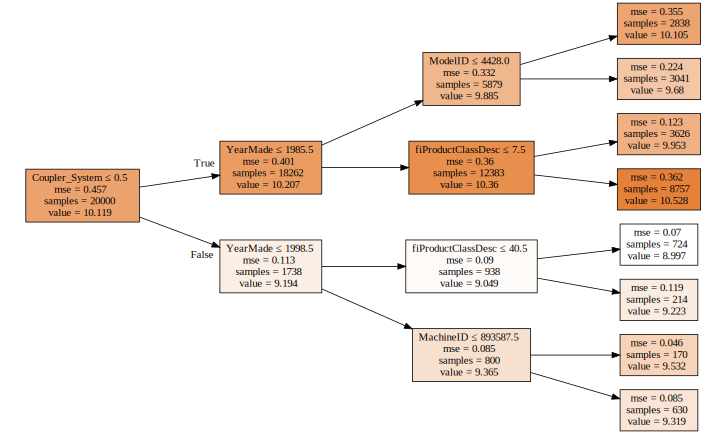

In [0]:
draw_tree(m.estimators_[0], df_trn, precision=3)

Let's see what happens if we create a bigger tree.

In [0]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[7.536443801682121e-17, 0.4962929138623079, 1.0, 0.5601302234411137]


The training set result looks great! But the **validation set is worse than our original model**. This is why we need to use bagging of multiple trees to get more generalizable results.


# Bagging